<div style="width: 100%; overflow: hidden;">
    <div style="width: 500px; float: left;"> 
        <h1>Ingenieurinformatik – Übung</h1>
        Lehrstuhl <b>Computational Civil Engineering</b><br>
        Kontakt: <a href = "mailto: cce-inginf@uni-wuppertal.de">Email senden</a> | Individuelle Kontakte siehe Webseite des Lehrstuhls<br>
        Links: 
        <a href="cce.uni-wuppertal.de/inginf">Vorlesungsskript</a> | 
        <a href="cce.uni-wuppertal.de/">Webseite des Lehrstuhls</a>
    </div>
    <div style="float:right;"> 
        <img src="logo_cce_combined.png" style="width:150px;"/>
    </div>
</div>

# Ableitungsfunktion

In dieser Aufgabe wird die numerische Berechnung der Ableitungsfunktion vorgestellt. Insbesondere wird die Berechnung der Werte am Rand und der Berechnungsfehler betrachtet.   

## Aufgabenteil A

Gegeben ist die Funktion $\sf y(x)$ mit

$$ \sf y(x) = e^{-(x-2)^2} $$

Stellen Sie die Funktion $\sf y$ und deren Ableitung $\sf y'$ graphisch im Intervall $\sf x \in [0,4]$ dar.

### Lösungshinweis

Die Ausgabe könnte wie folgt aussehen.

![](teil1.png)

### Lösungsvorschlag

Die analytische Ableitung der Funktion $\sf y(x)$ lautet

$$ \sf y'(x) = - 2(x-2)e^{-(x-2)^2} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0, 4, 100)
y = np.exp(-(x-2)**2)
yp = -2*(x-2)*np.exp(-(x-2)**2)

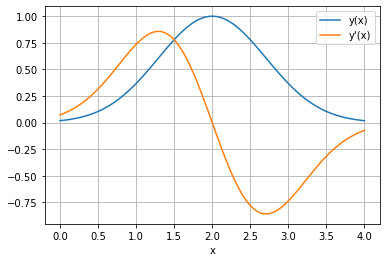

In [4]:
plt.plot(x, y, label='y(x)')
plt.plot(x, yp, label='y\'(x)')

plt.legend()
plt.grid()
plt.xlabel('x')

# Ausgabe für den Lösungshinweis
# plt.savefig('teil1.png')

## Aufgabenteil B

Diskretisieren Sie die das obige Intervall, z.B. mit 20 Stützstellen, und bestimmen sie numerisch die Ableitungsfunktion. Für Stützstellen, welche nicht am Rand liegen, verwenden Sie die zentrale Differenzenformel zweiter Ordnung. Die Randwerte werden mit den Vorwärtsdifferenzenquotienten

$$ \sf y'_i = \frac{y_{i+1} - y_i}{\Delta x} $$
bzw. mit dem Rückwärtsdifferenzentquotienten 

$$ \sf y'_i = \frac{y_{i} - y_{i-1}}{\Delta x} $$
jeweils erster Ordnung berechnet. Stellen Sie die analytisch und numerisch bestimmten Ableitungsfunktionen zusammen dar.

### Lösungshinweis

Die Ausgabe könnte wie folgt aussehen.

![](teil2.png)

### Lösungsvorschlag

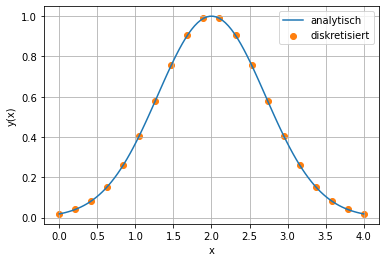

In [6]:
# Definition der Anzahl der Stützstellen für die Diskretisierung
nx = 20

# Diskretisierung des betrachteten Intervalls
xi = np.linspace(0, 4, nx)
dx = xi[1] - xi[0]

# Funktionswerte an den Stützstellen xi
yi = np.exp(-(xi-2)**2)

# Graphische Ausgabe, nur zur visuellen Kontrolle
plt.scatter(xi, yi, c='C1', label='diskretisiert')
plt.plot(x, y, label='analytisch')

plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid();

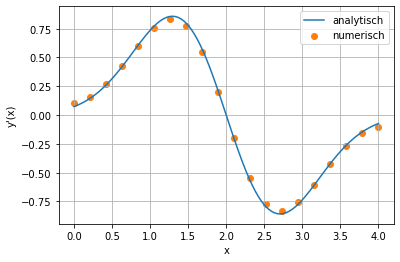

In [7]:
# Erstellung eines Arrays für die numerische Ableitung
yip = np.zeros_like(yi)

# Berechnung der Ableitung im inneren Bereich, d.h.
# ohne die Randwerte, mit der zentralen Differenzenformel
yip[1:-1] = (yi[2:] - yi[:-2]) / (2*dx)

# Berechnung der Ableitung an den Randpunkten
# mit der Vorwärtsdifferenzenformel
yip[0] = (yi[1] - yi[0]) / dx
# mit der Rückwärtsdifferenzenformel
yip[-1] = (yi[-1] - yi[-2]) / dx

# yip[0] = (-3*yi[0] + 4*yi[1] - yi[2]) / (2*dx)
# yip[-1] = (3*yi[-1] - 4*yi[-2] + yi[-3]) / (2*dx)

# Graphische Ausgabe
plt.plot(x, yp, label='analytisch')
plt.scatter(xi, yip, c='C1', label='numerisch')

plt.legend()
plt.ylabel('y\'(x)')
plt.xlabel('x')
plt.grid()

# Ausgabe für den Lösungshinweis 
# plt.savefig('teil2.png')

## Aufgabenteil C

Berechnen Sie die Abweichung zwischen der analytischen und numerischen Ableitung an jedem Stützpunkt und stellen Sie diese graphisch dar. Verkleinern Sie den Gitterabstand $\sf \Delta x$, z.B. um einen Faktor 4. Was fällt Ihnen auf?

### Lösungshinweis

Die Ausgaben könnten wie folgt aussehen.

![](teil3a.png)

![](teil3b.png)

### Lösungsvorschlag

In [8]:
# Definition einer Hilfsfunktion
def ableitung_f1(nx):
    # Diskretisierung des betrachteten Intervalls
    xi = np.linspace(0, 4, nx)
    dx = xi[1] - xi[0]

    # Funktionswerte an den Stützstellen xi
    yi = np.exp(-(xi-2)**2)
    
    # Erstellung eines Arrays für die numerische Ableitung
    yip = np.zeros_like(yi)

    # Berechnung der Ableitung im inneren Bereich, d.h.
    # ohne die Randwerte, mit der zentralen Differenzenformel
    yip[1:-1] = (yi[2:] - yi[:-2]) / (2*dx)

    # Berechnung der Ableitung an den Randpunkten
    # mit der Vorwärtsdifferenzenformel
    yip[0] = (yi[1] - yi[0]) / dx
    # mit der Rückwärtsdifferenzenformel
    yip[-1] = (yi[-1] - yi[-2]) / dx
    
    return xi, yip

In [9]:
# Analytische Ableitung als Funktion
def ableitung_analytisch(x):
    return -2*(x-2)*np.exp(-(x-2)**2)

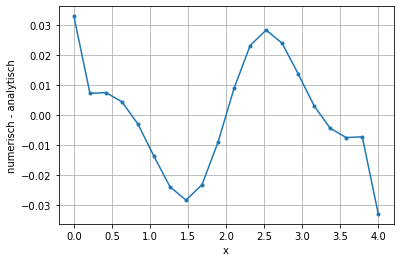

In [10]:
# Ausgabe für den Lösungshinweis nx = 20
xi, yip = ableitung_f1(20)
yip_analytisch = ableitung_analytisch(xi)
    
diff = yip - yip_analytisch
plt.plot(xi, diff, marker='.')
plt.grid()
plt.xlabel('x')
plt.ylabel('numerisch - analytisch')
# plt.savefig('teil3a.png')

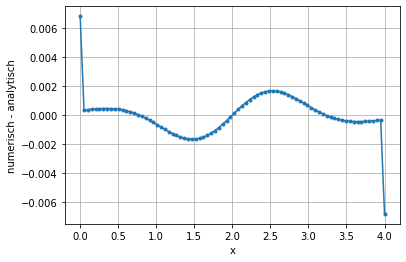

In [11]:
# Ausgabe für den Lösungshinweis nx = 80
xi, yip = ableitung_f1(80)
yip_analytisch = ableitung_analytisch(xi)
    
diff = yip - yip_analytisch
plt.plot(xi, diff, marker='.')
plt.grid()
plt.xlabel('x')
plt.ylabel('numerisch - analytisch')
# plt.savefig('teil3b.png')

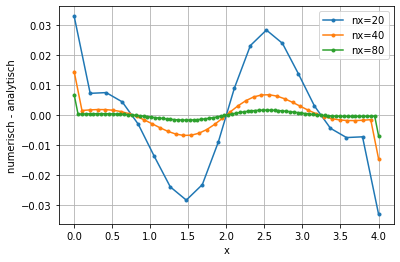

In [10]:
for nx in [20, 40, 80]:
    xi, yip = ableitung_f1(nx)
    yip_analytisch = ableitung_analytisch(xi)
    
    diff = yip - yip_analytisch
    plt.plot(xi, diff, marker='.', label=f'nx={nx}')

plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('numerisch - analytisch');

## Aufgabenteil D

Bestimmen Sie die Formel für den Vorwärtsdifferenzenquotienten zweiter Ordnung zur Berechnung der ersten Ableitung. Verwenden Sie dafür die Taylor-Entwicklung an zwei vorwärtsgerichteten Punkten, d.h. $\sf i+1, i+2$. 

Die Rückwärtsformel lautet

$$ \sf y'_i = \frac{3y_{i} - 4y_{i-1} + y_{i-2}}{2\Delta x} + \mathcal{O}\left(\Delta x^2\right)$$

### Lösungsvorschlag

Die Taylor-Entwicklungen an den Stellen $\sf x_i + \Delta x = x_{i+1}$ bzw. $\sf x_i + \Delta x = x_{i+1}$ lauten bis zur Ordnung $\sf \mathcal{O}\left(\Delta x^3\right)$:

$$\sf y(x_i + \Delta x) = y_{i+1} = y_i + y'_i\Delta x + \frac{1}{2}y''_i\Delta x^2 +  \mathcal{O}\left(\Delta x^3\right) $$
$$\sf y(x_i + 2\Delta x) = y_{i+2} = y_i + y'_i(2\Delta x) + \frac{1}{2}y''_i(2\Delta x)^2 + \mathcal{O}\left(\Delta x^3\right) $$

Das Ziel ist die Bestimmung des Terms $\sf y'$ nur mit Hilfe von den Funktionswerten, d.h. $\sf y$. Das bedeutet, dass die Terme der zweiten Ableitungen $\sf y''$ eliminiert werden müssen. Dies kann errreicht werden indem die erste Gleichung mit vier multipliziert wird und dann die zweite Gleichung davon substrahiert wird.

$$\sf 4y_{i+1} = 4y_i + 4y'_i\Delta x + 2y''_i\Delta x^2 +  \mathcal{O}\left(\Delta x^3\right) $$
$$\sf y_{i+2} = y_i + 2y'_i\Delta x + 2y''_i\Delta x^2 + \mathcal{O}\left(\Delta x^3\right) $$

$$\sf \Rightarrow 4y_{i+1} - y_{i+2} = 3y_i + 2y'_i\Delta x + \mathcal{O}\left(\Delta x^3\right) $$

Die Auflösung nach $\sf y'_i$ führt zu

$$ \sf y'_i = \frac{-3y_i + 4y_{i+1} - y_{i+2}}{2\Delta x} + \mathcal{O}\left(\Delta x^2\right) $$

Dies ist die Vorwärtsdifferenzenformel für die erste Ableitung zweiter Ordnung.

## Aufgabenteil E

Verwenden Sie die Formeln zweiter Ordnung für die Berechnung der Ableitung am Rand. Wie sieht nun die Abweichung zwischen der analytischen und numerischen Ableitung aus? 

### Lösungshinweis

Die Ausgabe könnte wie folgt aussehen.

![](teil5.png)

### Lösungsvorschlag

In [12]:
# Definition einer Hilfsfunktion, jetzt mit der Randberechnung 
# zweiter Ordnung
def ableitung_f2(nx):
    # Diskretisierung des betrachteten Intervalls
    xi = np.linspace(0, 4, nx)
    dx = xi[1] - xi[0]

    # Funktionswerte an den Stützstellen xi
    yi = np.exp(-(xi-2)**2)
    
    # Erstellung eines Arrays für die numerische Ableitung
    yip = np.zeros_like(yi)

    # Berechnung der Ableitung im inneren Bereich, d.h.
    # ohne die Randwerte, mit der zentralen Differenzenformel
    yip[1:-1] = (yi[2:] - yi[:-2]) / (2*dx)

    # Berechnung der Ableitung an den Randpunkten
    # mit der Vorwärtsdifferenzenformel
    yip[0] = (-3*yi[0] + 4*yi[1] - yi[2]) / (2*dx)
    # mit der Rückwärtsdifferenzenformel
    yip[-1] = (3*yi[-1] - 4*yi[-2] + yi[-3]) / (2*dx)
    
    return xi, yip

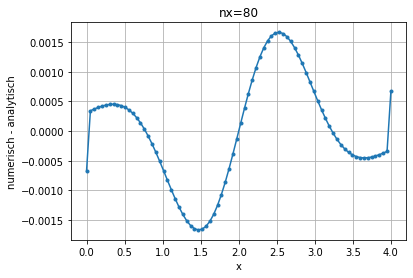

In [14]:
# Ausgabe für den Lösungshinweis nx = 80
xi, yip = ableitung_f2(80)
yip_analytisch = ableitung_analytisch(xi)
    
diff = yip - yip_analytisch
plt.plot(xi, diff, marker='.')
plt.grid()
plt.title('nx=80')
plt.xlabel('x')
plt.ylabel('numerisch - analytisch')
plt.savefig('teil5.png')

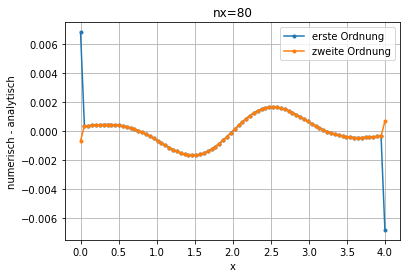

In [13]:
# Vergleichende Ausgabe
xi, yip_f1 = ableitung_f1(80)
xi, yip_f2 = ableitung_f2(80)

yip_analytisch = ableitung_analytisch(xi)
    
diff_f1 = yip_f1 - yip_analytisch
diff_f2 = yip_f2 - yip_analytisch

plt.plot(xi, diff_f1, marker='.', label='erste Ordnung')
plt.plot(xi, diff_f2, marker='.', label='zweite Ordnung')

plt.legend()
plt.grid()
plt.title('nx=80')
plt.xlabel('x')
plt.ylabel('numerisch - analytisch');